# 例3.20 某城市过去63年中每年降雪量数据

## table3.20.csv

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

## statsmodels自帶的畫ACF的函數

In [17]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=None,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=None,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()

## statsmodels自帶的LB test

In [18]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## 開始分析

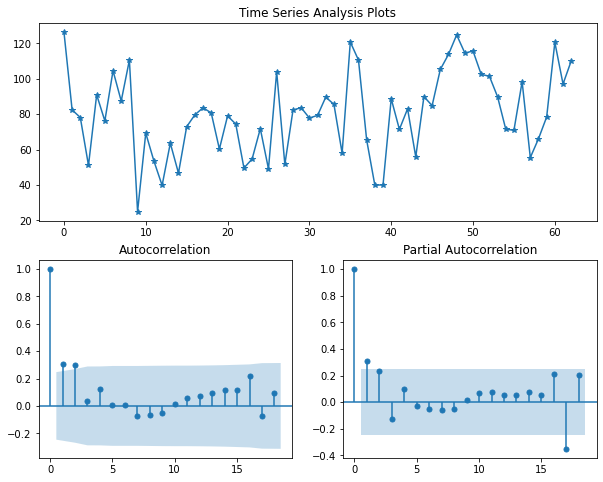

----time series: LB pure randomness test----
           LB    Pvalue  lags
0    6.190616  0.012843     1
1   12.063976  0.002401     2
2   12.159159  0.006857     3
3   13.273210  0.010015     4
4   13.278909  0.020901     5
5   13.283953  0.038742     6
6   13.647810  0.057812     7
7   13.971151  0.082520     8
8   14.158314  0.116804     9
9   14.175125  0.165152    10
10  14.429248  0.210144    11
11  14.892817  0.247350    12
12  15.567812  0.273257    13
13  16.659078  0.274801    14
14  17.854162  0.270410    15
15  21.881504  0.147059    16
16  22.383869  0.170403    17
17  23.255736  0.180953    18
18  23.483608  0.216712    19
19  24.594496  0.217387    20
20  26.423473  0.190760    21
21  29.692925  0.126121    22
22  35.815099  0.043081    23
23  36.230214  0.052127    24
24  36.348139  0.066481    25
25  36.925766  0.075912    26
26  36.973122  0.095570    27
27  36.973490  0.119446    28
28  37.241451  0.140149    29


D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [19]:
##read data
dfname='table3.20'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
drawts(y,dfname)
purerandtest(y)

## 參數估計

In [20]:
import statsmodels.tsa.api as smt
arma10=smt.ARMA(y,(0,2)).fit()
print('\n----fitting summary----')
print(arma10.summary())
print('sigma 2 of residual: %f'%arma10.sigma2)


----fitting summary----
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   63
Model:                     ARMA(0, 2)   Log Likelihood                -283.160
Method:                       css-mle   S.D. of innovations             21.623
Date:                Sat, 12 Nov 2022   AIC                            574.320
Time:                        01:16:20   BIC                            582.893
Sample:                             0   HQIC                           577.692
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8990      4.312     18.762      0.000      72.448      89.350
ma.L1.y        0.2971      0.127      2.345      0.019       0.049       0.545
ma.L2.y        0.2989      

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## 模型顯著性檢驗

In [21]:
resid=arma10.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----residual pure randomness test
----time series: LB pure randomness test----
           LB    Pvalue  lags
0    0.038480  0.844482     1
1    0.075264  0.963067     2
2    0.079341  0.994196     3
3    1.310732  0.859552     4
4    1.371558  0.927399     5
5    1.372891  0.967487     6
6    1.521804  0.981545     7
7    1.626807  0.990397     8
8    1.766884  0.994641     9
9    1.780051  0.997765    10
10   1.916773  0.998768    11
11   2.082033  0.999269    12
12   2.293633  0.999514    13
13   2.303558  0.999804    14
14   2.868674  0.999696    15
15   7.618138  0.959430    16
16  10.292761  0.890887    17
17  10.859301  0.900232    18
18  11.227943  0.915933    19
19  13.915998  0.834729    20
20  14.531381  0.845711    21
21  16.629733  0.783452    22
22  20.719203  0.598231    23
23  21.054886  0.635485    24
24  21.097821  0.687143    25
25  22.219322  0.676639    26
26  22.227568  0.725725    27
27  22.248763  0.769646    28
28  22.638495  0.792821    29


D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
D:\Anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## 模型優化

由HW3.6_3.20得，ARMA(0,2)比ARMA(2,0)更好

## 分析預測（预测未来10期）

In [22]:
##predict
myalpha=0.05
predvalue,predsigma,cinterval=arma10.forecast(steps=10,alpha=myalpha)
data1=np.c_[predvalue,predsigma,cinterval]
preddata=pd.DataFrame(data1,columns=['value','sigma','interval_left','interval_right'])
print('----prediction confidence interval: %d %%'%((1-myalpha)*100))
print(preddata)

----prediction confidence interval: 95 %
       value      sigma  interval_left  interval_right
0  86.177624  21.622929      43.797462      128.557786
1  85.902892  22.557265      41.691464      130.114320
2  80.899038  23.464618      34.909231      126.888845
3  80.899038  23.464618      34.909231      126.888845
4  80.899038  23.464618      34.909231      126.888845
5  80.899038  23.464618      34.909231      126.888845
6  80.899038  23.464618      34.909231      126.888845
7  80.899038  23.464618      34.909231      126.888845
8  80.899038  23.464618      34.909231      126.888845
9  80.899038  23.464618      34.909231      126.888845


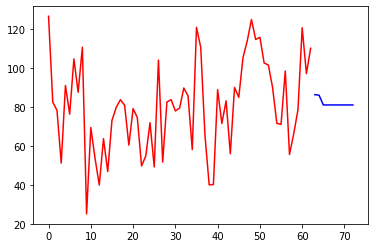

In [23]:
plt.plot(np.arange(len(y)),y,color='red')
plt.plot(np.arange(len(y),len(y)+len(predvalue)),predvalue,color='blue')
plt.show()